## 🤖 Agentic Chatbot with LangGraph

An agentic chatbot leverages KangGraph to build complex, autonomous, and dynamic conversational flows. KangGraph, a framework within LangChain, enables the creation of state machines that manage the chatbot's behavior, allowing it to make decisions, use tools, and respond to user input in a more sophisticated way than traditional chatbots.

#### Here's a more detailed explanation:

**Traditional Chatbots:** Typically follow pre-defined rules and scripts, offering limited conversational flexibility.

**Agentic Chatbots:**
Employ AI agents with reasoning and decision-making capabilities. They can adapt their responses, use external tools, and handle complex tasks, says Salesforce.

**KangGraph's Role:**
KangGraph is the core framework that enables the construction of agentic chatbots. It allows developers to define the chatbot's state transitions, routing logic, and tool usage, says Medium.

Example: \\
Imagine a weather chatbot. A traditional chatbot might simply provide the current weather. An agentic chatbot, using KangGraph, could also:
- Ask if the user wants the forecast for tomorrow, says Medium
- Check the user's location (with user consent) to provide a more relevant forecast
- Alert the user if there's a severe weather warning in their area, says Medium.

according to [Medium](https://medium.com/data-science-collective/langgraph-mcp-ollama-the-key-to-powerful-agentic-ai-e1881f43cf63).

#### Benefits of Agentic Chatbots:
- **Higher Personalization:** Tailor responses based on user profiles and preferences.
- **Complex Task Handling:** Manage intricate inquiries and tasks beyond the capabilities of traditional chatbots.
- **Autonomous Decision-Making:** Agents can make decisions and take actions without constant human supervision.

#### What is ReAct and how is it related to LangGraph and Agentic AI?

**ReAct (Reasoning and Acting)** is a powerful pattern that combines reasoning traces with actions. ReAct architecture basically refers to a framework that combines reasoning and action to enable AI agents to solve complex tasks and decision-making in agentic workflows. It's a machine learning paradigm that integrates the reasoning and action-taking capabilities of large language models (LLMs). ReAct agents don't separate decision-making from task execution, unlike traditional AI systems.

In LangGraph, we can implement this by adding a reasoning step before each action.



The agentic chatbot implemented in this specific project is designed to autonomously process user queries by dynamically deciding the best (or even all) sources of information, utilizing a LangGraph-based flow. It leverages specialized runners and API wrappers to search and retrieve data from Wikipedia for general knowledge and from Arxiv for academic research. Based on the nature of the query, the chatbot intelligently orchestrates these resources in parallel, aggregates the retrieved information, and synthesizes a clear, coherent final response. Its modular design ensures flexible, efficient information gathering and enables the chatbot to handle both casual and technical inquiries with depth and precision.

In [1]:
# Install the necessary libraries and frameworks
!pip install -q -U pydantic langchain langgraph langchain-core langchain-community
!pip install -q -U python-dotenv langchain-groq
!pip install -q -U arxiv
!pip install -q -U wikipedia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


What do you think enables us to utilize resources like Wikipedia and Arxiv to gather all the information we need? \\
You're right! \\
Simply through the two pairs of tools listed below to deal with Wikipedia and Arxiv content:
1. `WikipediaAPIWrapper`, `WikipediaQueryRun`
2. `ArxivAPIWrapper`, `ArxivQueryRun`

**ArxivAPIWrapper** and **WikipediaAPIWrapper**:

These are lower-level helpers or tools which wrap the raw API (Arxiv API, Wikipedia API) and provide easy Python methods to interact with them (like `.run()`, `.search()`). *They don't decide when/how to query — they just provide functions for querying.* Think of them as "tools" that the `QueryRun` classes use underneath.

**ArxivQueryRun** and **WikipediaQueryRun**:

These are Runnable classes or functions in LangChain (or similar frameworks) designed to execute a search/query operation directly. They take a query (like a research topic or a question) and return search results (papers from Arxiv, articles from Wikipedia). Think of them as the "doers" — you give them a task, and they go fetch the data.

#### In short:

|                | **QueryRun** (Runner)             | **APIWrapper** (Helper)             |
|----------------|------------------------------------|-------------------------------------|
| Purpose        | Run full queries easily            | Provide methods to query APIs       |
| Usage          | High-level, one-step search        | Lower-level, more flexible          |
| Think of as    | "Do it for me"                     | "Give me tools, I'll do it"          |
| Example        | `.invoke("machine learning")`      | `.run("machine learning")`           |


#### ⚡ A Real-world Analogy:

APIWrapper = You own a car (manual control — steering wheel, brakes).

QueryRun = You hire a driver (just say "take me to the library," and he drives).

In [2]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [3]:
arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper, description="Used to query Arxiv for recent papers.")

In [4]:
print(arxiv.name)

arxiv


In [5]:
# Make query to retrieve papers on a specific topic
arxiv.invoke("Logic Tensor Network")

"Published: 2016-07-07\nTitle: Logic Tensor Networks: Deep Learning and Logical Reasoning from Data and Knowledge\nAuthors: Luciano Serafini, Artur d'Avila Garcez\nSummary: We propose Logic Tensor Networks: a uniform framework for integrating\nautomatic learning and reasoning. A logic formalism called Real Logic is\ndefined on a first-order language whereby formulas have truth-value in the\ninterval [0,1] and semantics defined concretely on the domain of real numbers.\nLogical constants are interpreted "

In [6]:
wikipedia_api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wikipedia = WikipediaQueryRun(api_wrapper=wikipedia_api_wrapper, description="Used to query Wikipedia for recent articles.")
wikipedia.name

'wikipedia'

In [7]:
# Make query to retrieve articles on a specific topic
# Note that the number of content characters is already set andlimited to 500
wikipedia.invoke("LangGraph")

"Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n"

Very well!  \\
Having prepared the tools above regarding particular resources (Wikipedia & Arxiv in our case) through which one can perform real-time information extraction, we can also consider a search engine API designed specifically for AI agents and Large Language Models (LLMs), for instance, **Tavily** to search the live web for broad, up-to-date information.

Tavily is a search engine API designed specifically for AI agents and Large Language Models (LLMs). It provides real-time, accurate, and relevant information from the web, tailored for AI applications like those using Retrieval-Augmented Generation (RAG). Unlike traditional search APIs, *Tavily focuses on delivering information in a format optimized for AI processing, including dynamically searching the web, reviewing multiple sources, and extracting relevant content.*

| Feature              | Tavily API                       | Wikipedia API                | Arxiv API                        |
|----------------------|----------------------------------|-------------------------------|----------------------------------|
| Source               | Full Web                         | Wikipedia only                | Arxiv (academic papers)          |
| Type of Content      | Webpages, news, blogs, etc.      | Encyclopedic content          | Research articles, preprints     |
| Freshness            | Very fresh (real-time web)       | Updated periodically          | Updated regularly with new papers |
| Breadth              | Very broad (all web topics)      | Broad but limited to Wikipedia| Narrow (academia, research only) |
| Best Use             | General queries, trends, facts   | General knowledge, summaries  | Scientific, technical subjects   |
| Integration Ease     | Simple (one endpoint)            | Medium complexity             | Medium (requires search setup)   |


In [8]:
# Get api keys for both Groq and Tavily

from google.colab import userdata
import os

os.environ["TAVILY_API_KEY"] = userdata.get("tavily-api-key")
os.environ["GROQ_API_KEY"] = userdata.get("groq-api-key")

In [9]:
# Set up Tavily search tool

from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [10]:
tavily.invoke("Provide news on the most modern techs.")

[{'title': 'Tech | The Verge',
  'url': 'https://www.theverge.com/tech',
  'content': 'Tech\n\nThe latest tech news about the world’s best (and sometimes worst) hardware, apps, and much more. From top companies like Google and Apple to tiny startups vying for your attention, Verge Tech has the latest in what matters in technology daily.\n\nThe company is going to be ‘AI-first,’ says its CEO.\n\nThe Open AI CEO says that GPT-4o’s sycophantic tendencies will be dialed back.\n\nLatest In Tech [...] The AI development platform Hugging Face has partnered with The Robot Studio to release the documentation for the SO-101 robotic arm that will cost anywhere from $100 to $500 to build, as spotted earlier by TechCrunch. The arm has six motors and works with one or more cameras, letting you train it to carry out certain tasks — like putting a Lego brick in a bin. [...] Yelp’s AI assistant will now be able to match you up with a local service professional with help from AI-powered photo recognitio

Putting all tools together, you can exploit an LLM model via Grok Cloud to integrate with...

In [11]:
# embrace all the tools in a list
tools = [arxiv, wikipedia, tavily]

In [12]:
# initialize the LLM model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

In [13]:
llm.invoke("What is Deep Learning?")

AIMessage(content='\n<think>\nOkay, so I need to explain what deep learning is. Let me start by recalling what I know. I remember that deep learning is part of machine learning, right? It\'s like a subset. But how exactly does it differ from regular machine learning?\n\nHmm, maybe it\'s about neural networks. I think deep learning uses neural networks with many layers, hence the term "deep." Oh right, those are called deep neural networks (DNNs). But why are multiple layers important? I think each layer learns different features. Like, in image recognition, the first layers might detect edges, then more complex shapes, and so on until the network can recognize objects.\n\nWait, so traditional machine learning algorithms might require humans to manually select features, but deep learning automates that feature extraction through these layers. That\'s a key difference. But how does that work exactly? The neural networks use activation functions, and they adjust weights through training w

In [14]:
# bind llm with tools
llm_with_tools = llm.bind_tools(tools=tools)

In [17]:
results = llm_with_tools.invoke("What is new on AI?")

In [18]:
results

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wg4k', 'function': {'arguments': '{"query": "AI recent developments 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 413, 'prompt_tokens': 329, 'total_tokens': 742, 'completion_time': 1.037363804, 'prompt_time': 0.055767154, 'queue_time': 1.270294149, 'total_time': 1.093130958}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-771a51ed-64be-4377-9eb4-e4f89819f2c2-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'AI recent developments 2024'}, 'id': 'call_wg4k', 'type': 'tool_call'}], usage_metadata={'input_tokens': 329, 'output_tokens': 413, 'total_tokens': 742})

As you can see above, even though the llm has not provided any response and `content=''` the model has been able to understand the concept and tried to call the corresponding tool which in this case is Tavily. Let's try a different query and see whether a different tool will be called or not...

In [19]:
results2 = llm_with_tools.invoke("What is Artificial Intelligence?")

In [20]:
results2

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_9kna', 'function': {'arguments': '{"query": "Artificial Intelligence"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 240, 'prompt_tokens': 328, 'total_tokens': 568, 'completion_time': 0.601420867, 'prompt_time': 0.049490977, 'queue_time': 0.368184083, 'total_time': 0.650911844}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a910e08d-9fc8-44c2-aece-a589ccb704d3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Artificial Intelligence'}, 'id': 'call_9kna', 'type': 'tool_call'}], usage_metadata={'input_tokens': 328, 'output_tokens': 240, 'total_tokens': 568})

Wo0W! The tool has changed and the llm has decided to use Wikipedia to answer the question. So it is now clear that the llm is able to realize which tool is more useful based on the input.

We are almost ready to implement an entire graph or let's call it an agentic chatbot following a particular workflow as below:

In [66]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage, HumanMessage, SystemMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [47]:
# Create State object
class State(TypedDict):
  messages: Annotated[list[AnyMessage], add_messages]

In [48]:
# Implement chatbot

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [49]:
# Define the node Assistant for instance
def tool_llm_call(state:State):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [64]:
# Build graph
builder = StateGraph(State)

# Add nodes
builder.add_node("tool_llm_call", tool_llm_call)
builder.add_node("tools", ToolNode(tools))

# Add edges
builder.add_edge(START, "tool_llm_call")
builder.add_conditional_edges("tool_llm_call",
                              tools_condition)
builder.add_edge("tools", END)

In [62]:
# Compile the graph
graph = builder.compile()

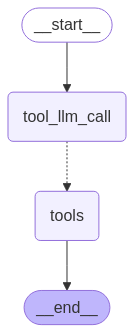

In [63]:
# View the graph
display(Image(graph.get_graph().draw_mermaid_png()))

Workflow is build up and we can try it through a very simple but clear message. The number passed as content in `HumanMessage()` refersto a research paper discussing Logic Tensor Networks.

In [67]:
messages=graph.invoke({"messages": HumanMessage(content="2012.13635")})
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

2012.13635
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_b48e)
 Call ID: call_b48e
  Args:
    query: 2012.13635
================================= Tool Message =================================
Name: arxiv

Published: 2021-12-23
Title: Logic Tensor Networks
Authors: Samy Badreddine, Artur d'Avila Garcez, Luciano Serafini, Michael Spranger
Summary: Artificial Intelligence agents are required to learn from their surroundings
and to reason about the knowledge that has been learned in order to make
decisions. While state-of-the-art learning from data typically uses
sub-symbolic distributed representations, reasoning is normally useful at a
higher level of abstraction with the use of a first-order logic


This output shows how a graph-based chatbot processes a user message by calling an external tool (Arxiv API).

#### 🔍 Brief Breakdown:

- **Human Message:** The user submitted a paper ID: 2012.13635.

- **AI Message:** The chatbot decided to use the arxiv tool to handle this input. \\

- **Tool Call:** The chatbot sent a request to Arxiv with the query 2012.13635. \\

- **Tool Message:** The Arxiv API responded with metadata about the paper:

  - Title: Logic Tensor Networks

  - Authors, Published date, and Summary

#### 🧠 What It Means:

The chatbot recognized the input as a paper reference, queried Arxiv, and returned structured academic info — part of a tool-augmented retrieval system.

Below let us try to implement a different workflow which enables the model to visit the llm calling tool (`tool_llm_call`) twice in order to answer the two questions asked in a single query...

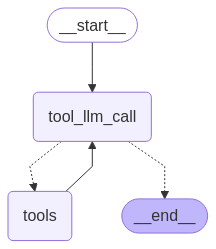

In [68]:
# Build graph
builder = StateGraph(State)

# Add nodes
builder.add_node("tool_llm_call", tool_llm_call)
builder.add_node("tools", ToolNode(tools))

# Add edges
builder.add_edge(START, "tool_llm_call")
builder.add_conditional_edges("tool_llm_call",
                              tools_condition)
builder.add_edge("tools", "tool_llm_call")

# Compile the graph
graph = builder.compile()

# View the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [69]:
messages=graph.invoke({"messages": HumanMessage(content="What is the most recent piece of news about Italy and What is the latest research paper on LTNs?")})
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

What is the most recent piece of news about Italy and What is the latest research paper on LTNs?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_26wa)
 Call ID: call_26wa
  Args:
    query: most recent news about Italy
  arxiv (call_9z8s)
 Call ID: call_9z8s
  Args:
    query: LTNs
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Find all the latest news about italy | euronews", "url": "https://www.euronews.com/news/europe/italy", "content": "An Italian newspaper let AI write all its content for a month\n\nWhite House floats US-Europe meeting as Vance meets Meloni in Rome\n\nWatch: Rescue of survivors from Italian cable car crash\n\nI visited a legendary spa resort in Italy where Romans once bathed\n\nArchaeological Museum of Naples displays stolen a

This output shows the chatbot answering two questions at once by using two tools:

#### 🧠 Summary:

Human asked:
- Latest news about Italy
- Latest research on LTNs

####Tool Calls:

`tavily_search_results_json`: searched for news → returned headlines about Italy.

`arxiv`: searched for research on "LTNs" → returned a 2019 paper on "Local-to-Nonlocal coupling".

#### AI Response:

- News: summarized recent Italian events like a cable car accident and political meetings.
- Research: detailed a 2019 paper (possibly mismatched to "LTNs" if the user meant "Logic Tensor Networks").

#### ⚠️ Insight:

1. The chatbot can run parallel tool calls.
2. Clarification may be needed if acronyms (like LTNs) have multiple interpretations.

## Thank you and I hope you enjoyed the tutorial! ✌🥳